# Assignment: Decision trees and random forests

### Objectives

The objectives of this assignment are:

to learn to use decision trees to build a transparent, human-readable predictive model.
to learn to use random forests for improved predictive performance.
Setup
In the assignment, use the Phishing dataset that is available at the UCI Machine Learning Repository: Phishing Websites Data Set. The target variable Result indicates whether a website is a phishing site or not.

Note: As the interpretation of the -1’s and 1’s in the Result column seems to be missing from the document, it may be helpful to know that a ‘1‘ corresponds to a phishing site and a ‘-1’ to a legitimate site.

Hint: Click the Download in Python button for quick access to the dataset. In addition, click the Download button to gain access to the dataset description.

Task
Your goal is to find out whether it is possible to reliably predict whether a website is a phishing site or not based on the easily obtainable information about the website. Based on the outcome, it may become possible to construct an automated system that warns users when they are about to visit a phishing website.

Part 1: Decision tree
Your initial goal is to construct a small yet useful decision tree that predicts whether a website is a phishing site or not.

The outcome should contain the following:

An image of the final decision tree.
Evaluation metrics for the decision tree.
Written instructions for an internet analyst to manually make the decision of whether the website is likely to be a phishing site or not. The instructions must match one-to-one with your decision tree, and be written in a way that is understandable to an engineer who is aware of the basics of internet technologies.
Part 2: Random forest
As the ultimate goal is to build an automated system, you don't have to stick to a single, relatively simple decision tree.

Try to tweak the performance of the decision tree by replacing it with a random forest. You may also try to tune the hyperparameters of the random forest to improve the performance.

Be sure to include the validation results in your report.

In real life, when you tune the hyperparameters based on the validation results, you should have yet another data set that is not used for tuning the hyperparameters, but applied only once after the tuning of the hyperparameters to obtain the final performance estimate of the tuned model. That is, there should be three sets: training, validation, and test sets. On this course, you may skip the need for the third set.

Deliverables
Submit a GitHub permalink that points to the Jupyter notebook as instructed in Oma. The submitted notebook must contain the problem analysis written in accordance with the CRISP-DM process model, complete with Markdown blocks and comments that clearly explain what has been done.

In [59]:
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

# fetch dataset
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# Split data for validation purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=15)
X

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


# Building a decision tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=52, ccp_alpha=0.004, max_depth=4)
model.fit(X_train, y_train)
print(model.classes_)

[-1  1]


# Decision tree

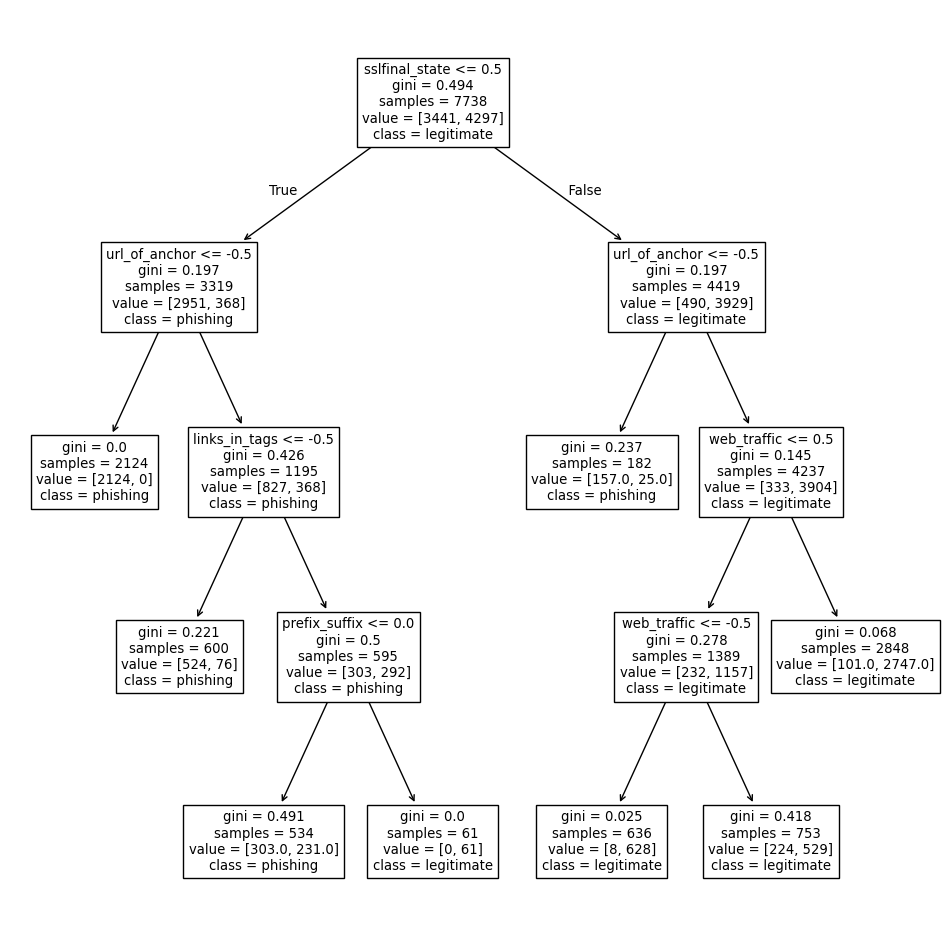

In [65]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize = (12, 12))
plot_tree(model, feature_names = X.keys(), class_names = ['phishing', 'legitimate'])
plt.show()

- First we check if there is ssl connection between client (usually browser) and server.
- If there is no ssl connection, we check if there is suspicious link hiding in anchor element. If so site is most likely phishing site.
- If not, we check if links in tags is smaller or equal to -0.5, if so site is phishing site.
- Again if not, we move to check if there is suspicious prefixes or suffixes, if so site is phishing site, if not site is most likely legitimate.
</br>
</br>
- If there is ssl connection, we check if there is anchor elements hiding url´s. If so site is phishing site.
- If not we move to another check web traffic if there is web traffic its most likely legitimate.

# Evaluation metrics

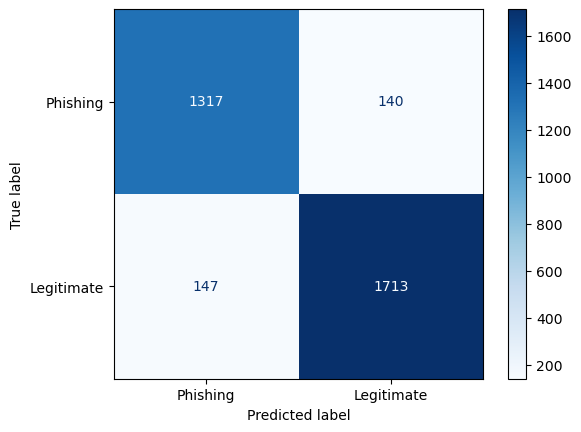

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)

cmd = ConfusionMatrixDisplay(cm, display_labels=['Phishing', 'Legitimate'])
cmd.plot(cmap='Blues')


# Evaluation report

In [63]:
report = classification_report(y_test, predictions, target_names=['Phishing', 'Legitimate'])
print(report)

              precision    recall  f1-score   support

    Phishing       0.90      0.90      0.90      1457
  Legitimate       0.92      0.92      0.92      1860

    accuracy                           0.91      3317
   macro avg       0.91      0.91      0.91      3317
weighted avg       0.91      0.91      0.91      3317

